In [91]:
#패키지 업로드
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
#데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
!pwd
!ls ./drive/'My Drive' -la
wine = pd.read_csv('./drive/My Drive/winequality-white.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
total 2917
-rw------- 1 root root   73930 Apr 12  2021  bag_cartoon.png
drwx------ 2 root root    4096 May 27 09:13 'Colab Notebooks'
-rw------- 1 root root  665719 May 27 10:13  image.zip
drwx------ 2 root root    4096 Apr  4 15:45  MG20190000_슬램덩크_완결
-rw------- 1 root root  598385 Apr 12  2021  myData.png
-rw------- 1 root root 1374640 May 30 00:56  myFirstModel.h5
-rw------- 1 root root  264426 Jun  2 15:02  winequality-white.csv


In [93]:
#wine quality 유효값과 평균 확인
print(set(wine['quality']))
wine['quality'].mean()

{3, 4, 5, 6, 7, 8, 9}


5.87790935075541

In [94]:
#학습용 데이터(80%)와 테스트 데이터(20%)로 분류 
train_dataset = wine.sample(frac=0.8,random_state=0)
test_dataset = wine.drop(train_dataset.index)

In [95]:
#학습용 레이블과 테스트 레이블 분류
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

In [96]:
#모델1 인공 신경망 구축
model = keras.Sequential([
  keras.layers.Dense(64,activation='relu', input_shape=[len(train_dataset.keys())]),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(16, activation='relu'), 
  keras.layers.Dense(1)                       
])


In [97]:
#모델1 인공 신경망 학습 (mse를 최소화하도록)
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.MeanSquaredError()])

In [98]:
#훈련 횟수 = 1000 으로 학습
model.fit(train_dataset, train_labels, epochs= 1000)

Epoch 1/1000
123/123 [==============================] - 1s 3ms/step - loss: 1.4591 - mean_squared_error: 1.4591
Epoch 2/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.7746 - mean_squared_error: 0.7746
Epoch 3/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.8130 - mean_squared_error: 0.8130
Epoch 4/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.7668 - mean_squared_error: 0.7668
Epoch 5/1000
123/123 [==============================] - 0s 4ms/step - loss: 0.6957 - mean_squared_error: 0.6957
Epoch 6/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.6566 - mean_squared_error: 0.6566
Epoch 7/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.6548 - mean_squared_error: 0.6548
Epoch 8/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.6488 - mean_squared_error: 0.6488
Epoch 9/1000
123/123 [==============================] - 0s 3ms/step - loss: 0.6999 - mean_squared_error:

In [99]:
#모델1 각 데이터 예측 quality값
pred = model.predict(test_dataset)
print(pred)

[[ 5.081328 ]
 [ 5.081328 ]
 [ 6.26218  ]
 [ 5.696075 ]
 [ 5.7451367]
 [ 5.517676 ]
 [ 6.3464417]
 [ 5.0273495]
 [ 5.705973 ]
 [ 6.2021337]
 [ 5.64484  ]
 [ 4.8797674]
 [ 5.8116736]
 [ 6.794241 ]
 [ 6.016713 ]
 [ 5.1785707]
 [ 5.3808765]
 [ 5.192291 ]
 [ 5.383403 ]
 [ 5.1813893]
 [ 4.223452 ]
 [ 6.1415453]
 [ 5.938299 ]
 [ 5.9794154]
 [ 5.6393833]
 [ 4.952975 ]
 [ 4.952975 ]
 [ 6.097994 ]
 [ 5.965905 ]
 [ 5.9097924]
 [ 5.683786 ]
 [ 5.9179497]
 [ 6.5481467]
 [ 5.4115744]
 [ 5.5956545]
 [ 5.354214 ]
 [ 5.2401676]
 [ 5.453361 ]
 [ 5.5249734]
 [ 5.4448776]
 [ 5.2804317]
 [ 5.2804317]
 [ 5.459916 ]
 [ 5.054978 ]
 [ 6.003036 ]
 [ 5.6858745]
 [ 5.802685 ]
 [ 6.1280103]
 [ 5.194761 ]
 [ 6.292194 ]
 [ 5.3748946]
 [ 5.0837746]
 [ 6.272451 ]
 [ 5.540413 ]
 [ 5.45552  ]
 [ 6.8832445]
 [ 6.521039 ]
 [ 5.548726 ]
 [ 5.3458095]
 [ 5.44527  ]
 [ 5.1807165]
 [ 5.961909 ]
 [ 5.753882 ]
 [ 7.430406 ]
 [ 5.155321 ]
 [ 5.757705 ]
 [ 6.8337016]
 [ 5.7455688]
 [ 5.4695725]
 [ 6.500338 ]
 [ 5.171633 ]
 [ 4.6

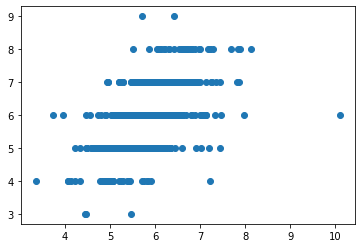

In [100]:
#전반적인 산점도 확인
plt.scatter(pred, test_labels)
plt.show()

In [101]:
#MSE 와 RSE 값 구하기
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, pred)
print(mse)

from sklearn.metrics import mean_absolute_percentage_error
rse = mean_absolute_percentage_error(test_labels, pred)
print(rse)

0.5290145214873111
0.09485381894313212


In [102]:
#모델2 인공 신경망 학습 (분류 정확도 높이기)
model_2 = keras.Sequential([
  keras.layers.Dense(64,activation='relu', input_shape=[len(train_dataset.keys())]),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(16, activation='relu'), 
  keras.layers.Dense(10 ,activation='sigmoid')                       
])
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2.fit(train_dataset, train_labels, epochs=1000)

Epoch 1/1000
123/123 [==============================] - 1s 3ms/step - loss: 1.5104 - accuracy: 0.3780
Epoch 2/1000
123/123 [==============================] - 0s 4ms/step - loss: 1.3054 - accuracy: 0.4308
Epoch 3/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.2739 - accuracy: 0.4477
Epoch 4/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.2943 - accuracy: 0.4405
Epoch 5/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.2505 - accuracy: 0.4464
Epoch 6/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.2314 - accuracy: 0.4553
Epoch 7/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.2405 - accuracy: 0.4510
Epoch 8/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.2414 - accuracy: 0.4579
Epoch 9/1000
123/123 [==============================] - 0s 4ms/step - loss: 1.2116 - accuracy: 0.4712
Epoch 10/1000
123/123 [==============================] - 0s 3ms/step - loss: 1.205

In [103]:
#모델2 각 데이터 예측 quality값
pred2 = model_2.predict(test_dataset)
print(pred2)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.4255972e-06
  8.6200626e-27 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.4255972e-06
  8.6200626e-27 0.0000000e+00]
 [7.1027699e-20 7.0043376e-22 1.1253663e-19 ... 9.5757151e-01
  8.2632899e-02 1.6905132e-11]
 ...
 [4.6292787e-32 0.0000000e+00 2.8311974e-36 ... 2.1974046e-08
  1.5887772e-12 4.1913986e-04]
 [3.0971541e-11 2.2099171e-12 2.5111405e-10 ... 7.8047389e-01
  1.5439120e-01 1.8168555e-05]
 [1.7756307e-19 8.3366265e-23 5.9097614e-19 ... 5.2877110e-01
  1.0263026e-03 1.5890956e-08]]


In [104]:
#pred2 값들 중 예측확률이 가장 높은 quality값을 새로운 리스트에 추가
pred_2_new = []
for i in pred2:
  pred_2_new.append(np.argmax(i))
print(pred_2_new)

[5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 5, 6, 5, 5, 4, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 7, 6, 6, 6, 5, 5, 5, 4, 5, 5, 5, 7, 5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 6, 7, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 7, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 5, 7, 5, 6, 4, 5, 5, 5, 6, 6, 7, 3, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 4, 5, 4, 6, 6, 6, 8, 6, 7, 5, 6, 6, 6, 8, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 8, 6, 5, 7, 6, 8, 6, 4, 6, 5, 5, 4, 6, 5, 6, 6, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 7, 8, 8, 6, 5, 6, 7, 6, 8, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 4, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 7, 6, 5, 6, 4, 6, 6, 5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 5, 6, 6, 7, 

In [105]:
#테스트값과 예측값 행렬식
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(pred_2_new, test_labels)
print(cf_matrix)

[[  0   1   0   2   0   0   0]
 [  0  12  10   9   0   0   0]
 [  2  13 190 137  18   1   0]
 [  1   6  74 255  71  14   2]
 [  0   1  13  40  74   7   0]
 [  0   0   0   9   7  11   0]
 [  0   0   0   0   0   0   0]]


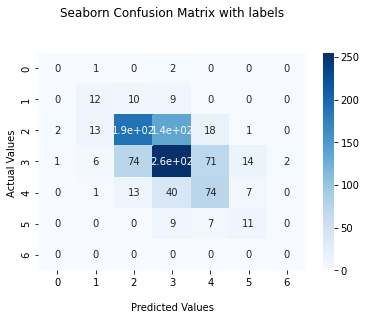

In [106]:
#테스트값과 예측값 행렬식 시각화
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [107]:
test_loss , test_accuracy = model_2.evaluate(test_dataset, test_labels)
print(test_accuracy)

31/31 [==============================] - 0s 3ms/step - loss: 2.7544 - accuracy: 0.5724
0.5724489688873291
